In [ ]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

#from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Read the csv file
df = pd.read_csv('/content/drive/MyDrive/GE.csv')
print(df.head()) #7 columns, including the Date.
print(len(df))

         Date       Open       High        Low      Close  Adj Close   Volume
0  2023-05-01  79.401436  81.404633  79.305664  80.750198  80.396339  7408237
1  2023-05-02  80.295288  81.428574  79.960098  81.013565  80.658554  7485046
2  2023-05-03  81.308861  82.162811  80.853951  81.221069  80.865158  5917543
3  2023-05-04  80.997604  81.205109  77.741425  79.265762  78.918419  9055431
4  2023-05-05  80.271347  81.213089  79.608940  80.000000  79.649429  6302841
252


In [ ]:
#Separate dates for future plotting
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
print(df['Date'].tail(15)) #Check last few dates.

237   2024-04-10
238   2024-04-11
239   2024-04-12
240   2024-04-15
241   2024-04-16
242   2024-04-17
243   2024-04-18
244   2024-04-19
245   2024-04-22
246   2024-04-23
247   2024-04-24
248   2024-04-25
249   2024-04-26
250   2024-04-29
251   2024-04-30
Name: Date, dtype: datetime64[ns]


<ipython-input-4-fb910e6c8daa>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


In [ ]:
df_input=df[['Open', 'High', 'Low', 'Close', 'Adj Close']]

In [ ]:
df_input.describe()


,Open,High,Low,Close,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,101.522247,102.731026,100.545529,101.732871,101.475118
std,21.811776,22.392696,21.355667,21.986586,22.043834
min,79.122108,79.792496,77.741425,78.850761,78.505234
25%,87.354351,88.501596,86.270947,87.661614,87.369942
50%,91.516362,92.458099,90.885875,91.719876,91.402580
75%,105.241418,107.204710,104.904232,105.983640,105.795439
max,163.559998,166.259995,163.000000,164.490005,164.490005


['Open', 'High', 'Low', 'Close', 'Adj Close']


<Axes: >

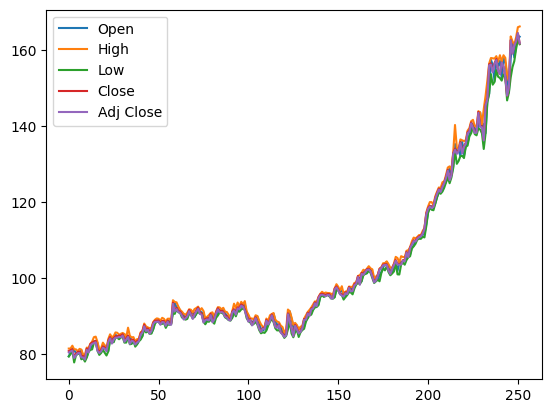

In [ ]:
cols = list(df)[1:6]
#Date and volume columns are not used in training.
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)
df_for_plot=df_for_training.tail(5000)
df_for_plot.plot.line()

In [ ]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = MinMaxScaler()
data_Scaled = scaler.fit_transform(df_input)
data_Scaled


array([[0.00330809, 0.01864443, 0.018347  , 0.02217952, 0.02199349],
       [0.013894  , 0.01892131, 0.02602287, 0.02525482, 0.02504304],
       [0.02589777, 0.02741279, 0.0365069 , 0.02767782, 0.02744584],
       ...,
       [0.96980025, 0.96657704, 0.9684489 , 0.97501147, 0.97511188],
       [0.99336793, 0.99780278, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.98334481, 0.96882273, 0.96894801]])

In [ ]:
features= data_Scaled
target=data_Scaled[:,0]


In [ ]:
TimeseriesGenerator(features,target,length=14, sampling_rate=1,batch_size=1)[0]

(array([[[0.00330809, 0.01864443, 0.018347  , 0.02217952, 0.02199349],
         [0.013894  , 0.01892131, 0.02602287, 0.02525482, 0.02504304],
         [0.02589777, 0.02741279, 0.0365069 , 0.02767782, 0.02744584],
         [0.02221155, 0.01633692, 0.        , 0.00484592, 0.00480533],
         [0.01361047, 0.01642921, 0.02190413, 0.01341954, 0.01330695],
         [0.01020787, 0.01042981, 0.02630368, 0.01975661, 0.01959105],
         [0.01540627, 0.0177214 , 0.03145204, 0.02050208, 0.02033017],
         [0.02211704, 0.01559849, 0.00982871, 0.0068961 , 0.0068383 ],
         [0.00245749, 0.        , 0.01319864, 0.00661655, 0.00656102],
         [0.00415878, 0.00018458, 0.00280814, 0.        , 0.        ],
         [0.        , 0.02150569, 0.01507077, 0.02982128, 0.02957127],
         [0.01975416, 0.02076725, 0.03257535, 0.0217136 , 0.02153157],
         [0.02580325, 0.03322761, 0.03875351, 0.04352036, 0.04315541],
         [0.03544397, 0.03968846, 0.04043843, 0.04855274, 0.04814575]]]),
 ar

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(features, target, test_size=0.20,random_state=47, shuffle=False)

In [ ]:
x_train.shape

(201, 5)

In [ ]:
x_test.shape

(51, 5)

In [ ]:
win_length=5
batch_size=32
num_features=5
train_generator=TimeseriesGenerator(features,target,length=win_length, sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(features,target,length=win_length, sampling_rate=1,batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[0.00330809, 0.01864443, 0.018347  , 0.02217952, 0.02199349],
         [0.013894  , 0.01892131, 0.02602287, 0.02525482, 0.02504304],
         [0.02589777, 0.02741279, 0.0365069 , 0.02767782, 0.02744584],
         [0.02221155, 0.01633692, 0.        , 0.00484592, 0.00480533],
         [0.01361047, 0.01642921, 0.02190413, 0.01341954, 0.01330695]],
 
        [[0.013894  , 0.01892131, 0.02602287, 0.02525482, 0.02504304],
         [0.02589777, 0.02741279, 0.0365069 , 0.02767782, 0.02744584],
         [0.02221155, 0.01633692, 0.        , 0.00484592, 0.00480533],
         [0.01361047, 0.01642921, 0.02190413, 0.01341954, 0.01330695],
         [0.01020787, 0.01042981, 0.02630368, 0.01975661, 0.01959105]],
 
        [[0.02589777, 0.02741279, 0.0365069 , 0.02767782, 0.02744584],
         [0.02221155, 0.01633692, 0.        , 0.00484592, 0.00480533],
         [0.01361047, 0.01642921, 0.02190413, 0.01341954, 0.01330695],
         [0.01020787, 0.01042981, 0.02630368, 0.01975661, 0.01959105],


In [ ]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(50, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.SimpleRNN(50,return_sequences=False))
model.add(tf.keras.layers.Dense(1))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 5, 50)             2800      
                                                                 
 dropout_1 (Dropout)         (None, 5, 50)             0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7901 (30.86 KB)
Trainable params: 7901 (30.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

history=model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

Epoch 1/50


<ipython-input-40-2cd0d306e508>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])


8/8 [==============================] - 4s 107ms/step - loss: 0.0473 - mean_absolute_error: 0.1654 - val_loss: 0.0684 - val_mean_absolute_error: 0.2424
Epoch 2/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0720 - mean_absolute_error: 0.2124 - val_loss: 0.0047 - val_mean_absolute_error: 0.0536
Epoch 3/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0409 - mean_absolute_error: 0.1445 - val_loss: 0.0129 - val_mean_absolute_error: 0.0926
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0433 - mean_absolute_error: 0.1843 - val_loss: 0.0054 - val_mean_absolute_error: 0.0651


In [ ]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-41-a68ec1088d46>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.0054038045927882195, 0.06513025611639023]

In [ ]:
predictions=model.predict_generator(test_generator)

<ipython-input-42-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [ ]:
predictions.shape[0]

247

In [ ]:
predictions

array([[-8.93943757e-02],
       [-2.44428068e-02],
       [-2.34463755e-02],
       [ 9.28230584e-04],
       [-4.85827476e-02],
       [ 1.18812462e-02],
       [-4.07195371e-03],
       [-4.43663709e-02],
       [-5.02011217e-02],
       [-3.77659909e-02],
       [-6.00631349e-02],
       [-4.24338467e-02],
       [-6.68646544e-02],
       [-7.65572786e-02],
       [-4.23985198e-02],
       [ 1.94922592e-02],
       [-1.07814539e-02],
       [-9.04990453e-03],
       [ 6.80051297e-02],
       [ 1.73789971e-02],
       [-5.00694811e-02],
       [-3.37992162e-02],
       [-4.60036136e-02],
       [-4.42837216e-02],
       [-1.08152658e-01],
       [-7.76988566e-02],
       [-6.93631470e-02],
       [-1.43920243e-01],
       [-7.54519850e-02],
       [-5.83639331e-02],
       [-7.21851140e-02],
       [-5.73406667e-02],
       [ 4.29053865e-02],
       [-2.74270736e-02],
       [-9.78438091e-03],
       [ 2.97416039e-02],
       [ 3.92395817e-03],
       [ 6.82803094e-02],
       [ 2.0

In [ ]:
x_test[:,1:][win_length:]

array([[0.50948941, 0.52560632, 0.52159257, 0.52096415],
       [0.50792025, 0.52130037, 0.51432364, 0.5137373 ],
       [0.52545707, 0.52804014, 0.5294206 , 0.52874689],
       [0.52794917, 0.54002188, 0.54134916, 0.54060639],
       [0.54770111, 0.55659045, 0.55775081, 0.55691312],
       [0.57031422, 0.57259733, 0.57974405, 0.57877911],
       [0.57382171, 0.55387582, 0.55038871, 0.54959364],
       [0.56302271, 0.57156762, 0.56567214, 0.56478858],
       [0.61609455, 0.60058602, 0.63090616, 0.62964513],
       [0.69990174, 0.6546912 , 0.64451216, 0.64317231],
       [0.63169296, 0.61378457, 0.63146528, 0.63020093],
       [0.62597044, 0.62267727, 0.63985252, 0.63853974],
       [0.65596761, 0.63746741, 0.66501424, 0.66355581],
       [0.65319864, 0.63859063, 0.63323598, 0.6319615 ],
       [0.65089114, 0.63166375, 0.65317896, 0.65178902],
       [0.65319864, 0.66620492, 0.66268442, 0.66123943],
       [0.68254959, 0.67013637, 0.69576746, 0.69413114],
       [0.69039502, 0.69831227,

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
df_pred

,0,0,1,2,3
0,-0.089926,0.509489,0.525606,0.521593,0.520964
1,-0.039919,0.507920,0.521300,0.514324,0.513737
2,-0.066732,0.525457,0.528040,0.529421,0.528747
3,-0.071872,0.527949,0.540022,0.541349,0.540606
4,-0.082118,0.547701,0.556590,0.557751,0.556913
...,...,...,...,...,...
242,0.973035,NaN,NaN,NaN,NaN
243,0.974060,NaN,NaN,NaN,NaN
244,0.899128,NaN,NaN,NaN,NaN
245,0.978418,NaN,NaN,NaN,NaN


In [ ]:
rev_trans=scaler.inverse_transform(df_pred)
rev_trans

array([[ 71.5289755 , 123.846771  , 122.553871  , 123.519554  ,
        123.300217  ],
       [ 75.75142777, 123.71109   , 122.186752  , 122.897049  ,
        122.678818  ],
       [ 73.48742227, 125.227455  , 122.761375  , 124.189941  ,
        123.969414  ],
       ...,
       [155.04261103,          nan,          nan,          nan,
                 nan],
       [161.73765883,          nan,          nan,          nan,
                 nan],
       [161.74736225,          nan,          nan,          nan,
                 nan]])

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

Open         247
High         247
Low          247
Close        247
Adj Close    247
dtype: int64

In [ ]:
df_final['open_pred']=rev_trans[:,0]

<ipython-input-50-7d646e04597d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['open_pred']=rev_trans[:,0]


In [ ]:
df_final

,Open,High,Low,Close,Adj Close,open_pred
5,79.984039,80.694336,79.984039,80.542702,80.189766,71.528975
6,80.422981,81.324821,80.422981,80.606544,80.253319,75.751428
7,80.989624,81.141258,78.579407,79.441338,79.093224,73.487422
8,79.329613,79.792496,78.866722,79.417397,79.069382,73.053430
9,79.473267,79.808456,77.980843,78.850761,78.505234,72.188218
...,...,...,...,...,...,...
247,161.869995,162.339996,155.559998,159.190002,159.190002,161.283093
248,158.089996,161.479996,157.119995,161.259995,161.259995,161.369704
249,161.009995,163.369995,160.309998,162.350006,162.350006,155.042611
250,163.000000,166.070007,163.000000,164.490005,164.490005,161.737659


<Axes: >

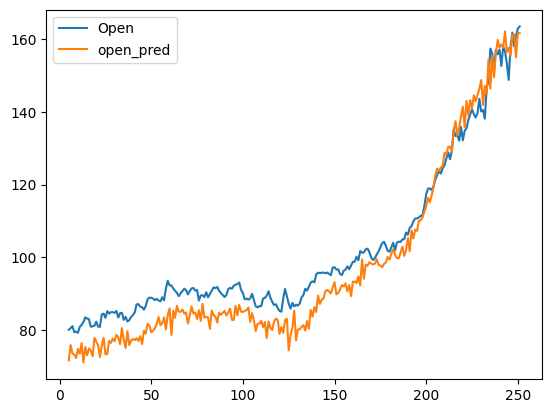

In [ ]:
df_final[['Open','open_pred']].plot()

In [ ]:
# Assuming you've already trained your model and have your test_generator ready
mse, mae = model.evaluate(test_generator, verbose=0)
print("Test MSE:", mse)
print("Test MAE:", mae)


Test MSE: 0.0054038045927882195
Test MAE: 0.06513025611639023


In [ ]:
from sklearn.metrics import r2_score

# You need the actual and predicted values as arrays to compute R² score
# Let's assume you have these values in actuals and predictions variables
# You can obtain these by comparing indices in your test set or using your earlier defined DataFrame
actuals = df_final['Open'].values
predictions = df_final['open_pred'].values

# Compute R² score
r2 = r2_score(actuals, predictions)
print("Test R² score:", r2)


Test R² score: 0.9187661706919703


In [ ]:
import numpy as np
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])

# After training, evaluate the model on the test set
test_loss, test_mae = model.evaluate(test_generator, verbose=0)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)

# Optionally, calculate RMSE
test_rmse = np.sqrt(test_loss)
print("Test RMSE:", test_rmse)


Test MSE: 0.0054038045927882195
Test MAE: 0.06513025611639023
Test RMSE: 0.0735105747004349
